In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
 
%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


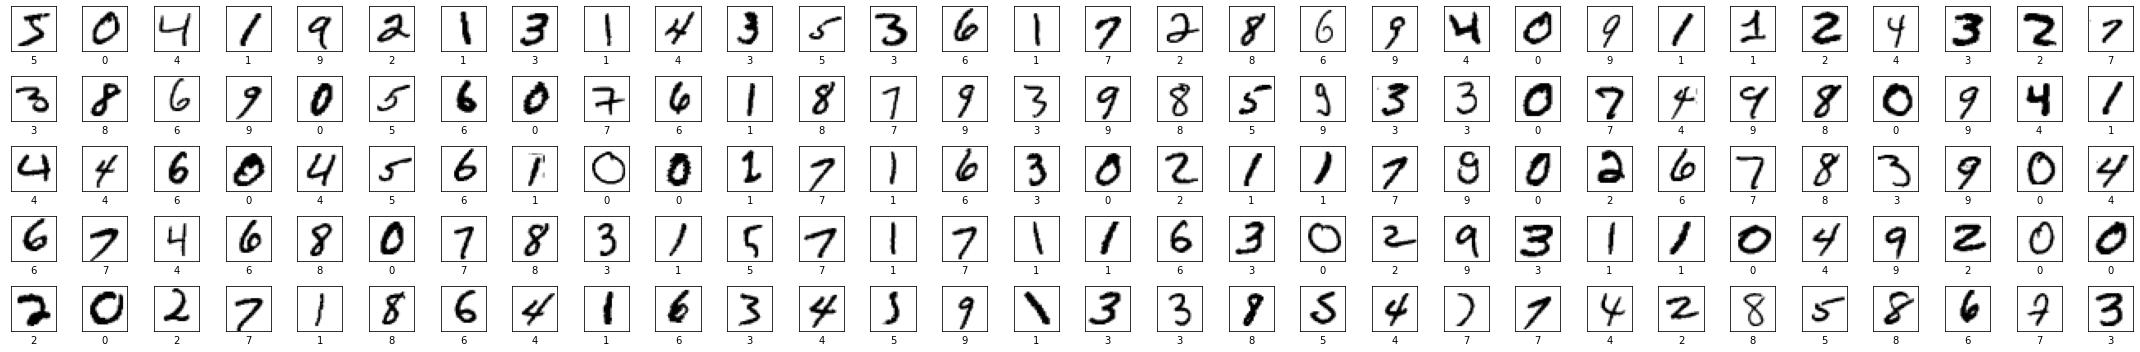

In [3]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
# Data Normalization

X_train, X_test = X_train.reshape(-1, 28,28,1).astype("float32") / 255.0, X_test.reshape(-1, 28,28,1).astype("float32")  / 255.0

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [6]:
# Using 'Adam'

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
h = model.fit(x=X_train, y=Y_train, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.2480 - accuracy: 0.9234 - val_loss: 0.0783 - val_accuracy: 0.9758
Epoch 2/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.0584 - val_accuracy: 0.9833
Epoch 3/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0582 - val_accuracy: 0.9823
Epoch 4/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0419 - val_accuracy: 0.9876
Epoch 5/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0419 - val_accuracy: 0.9887


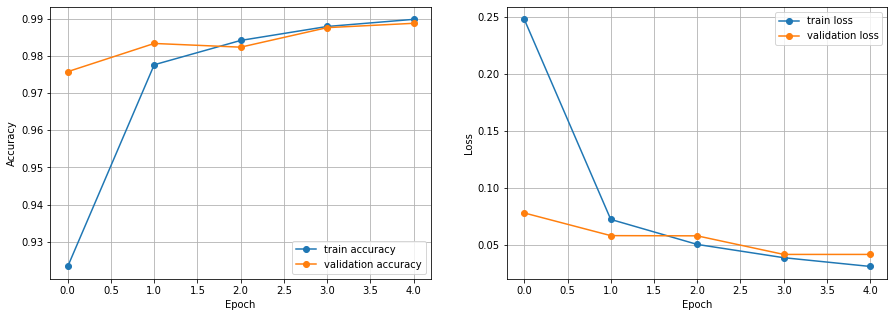

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.0404 - accuracy: 0.9877

Test Accuracy: 0.9876999855041504

Test Loss: 0.040449753403663635


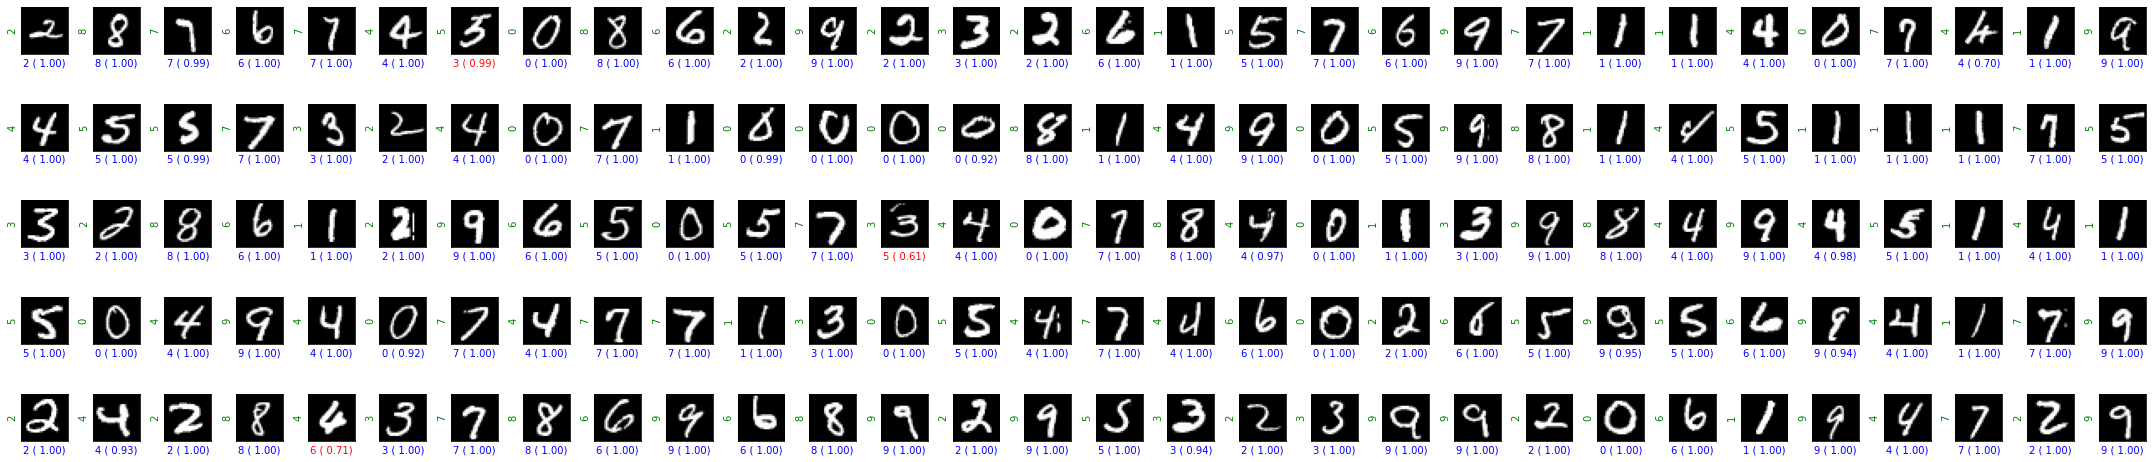

In [10]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [11]:
(X_train1, Y_train1), (X_test1, Y_test1) = mnist.load_data()
print(X_train1.shape, Y_train1.shape)
print(X_test1.shape, Y_test1.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


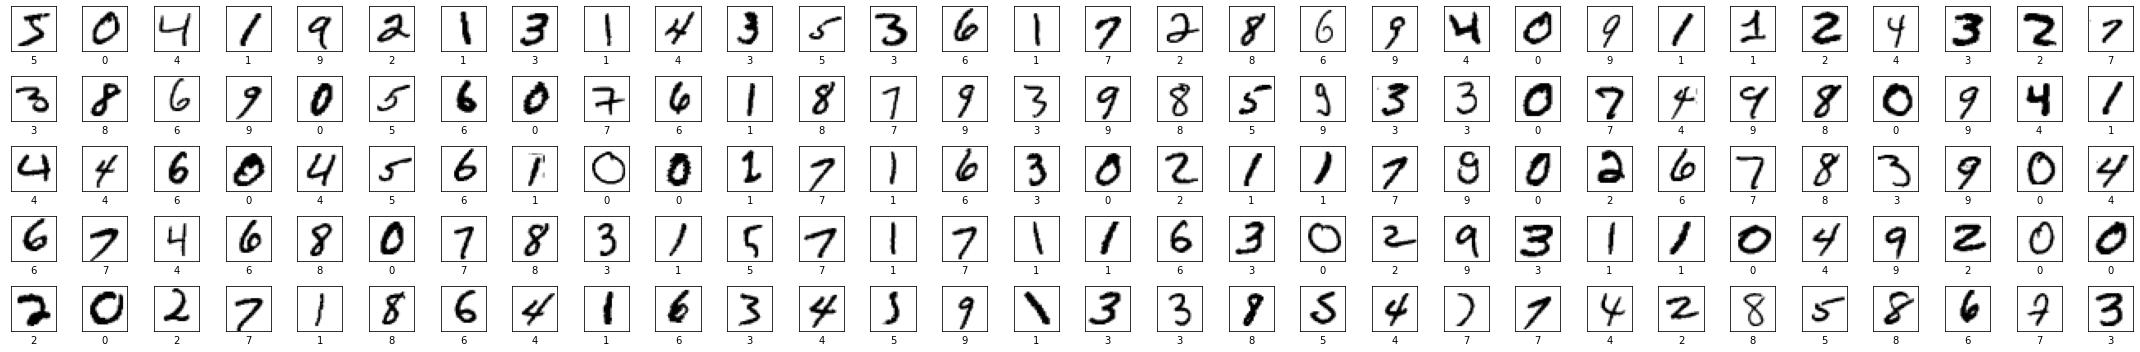

In [12]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train1[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train1[i])
        i += 1
plt.tight_layout()
plt.show()

In [13]:
# Without Normalization

X_train1, X_test1 = X_train1.reshape(-1, 28,28,1), X_test1.reshape(-1, 28,28,1)

In [14]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [15]:
# Using 'Adam'

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
h1 = model.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 42s 35ms/step - loss: 0.4469 - accuracy: 0.9070 - val_loss: 0.1070 - val_accuracy: 0.9675
Epoch 2/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0948 - accuracy: 0.9717 - val_loss: 0.0796 - val_accuracy: 0.9762
Epoch 3/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0736 - val_accuracy: 0.9791
Epoch 4/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0713 - val_accuracy: 0.9795
Epoch 5/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0761 - val_accuracy: 0.9797


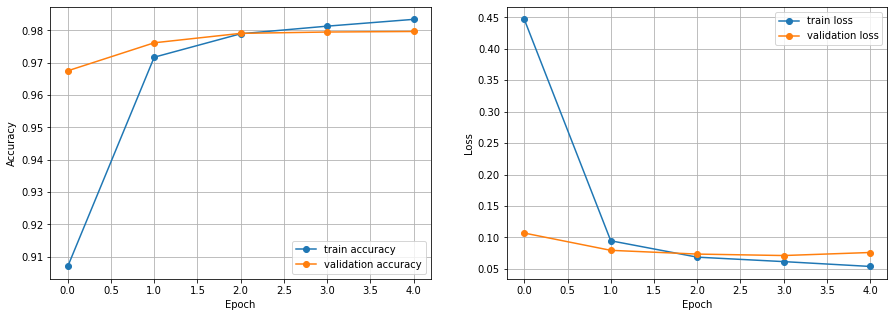

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
test_loss1, test_acc1 = model.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 3s 8ms/step - loss: 0.0713 - accuracy: 0.9807

Test Accuracy: 0.9807000160217285

Test Loss: 0.07127891480922699


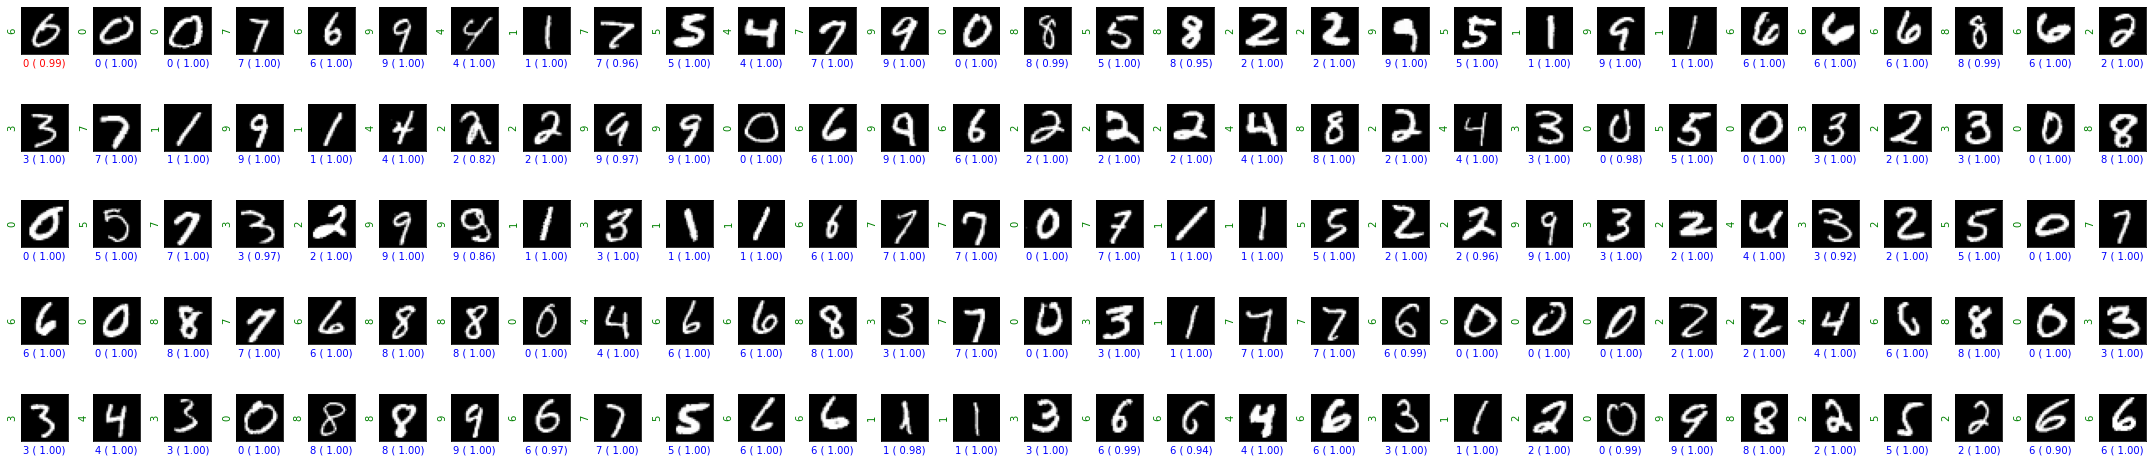

In [19]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [20]:
(X_train2, Y_train2), (X_test2, Y_test2) = mnist.load_data()
print(X_train2.shape, Y_train2.shape)
print(X_test2.shape, Y_test2.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


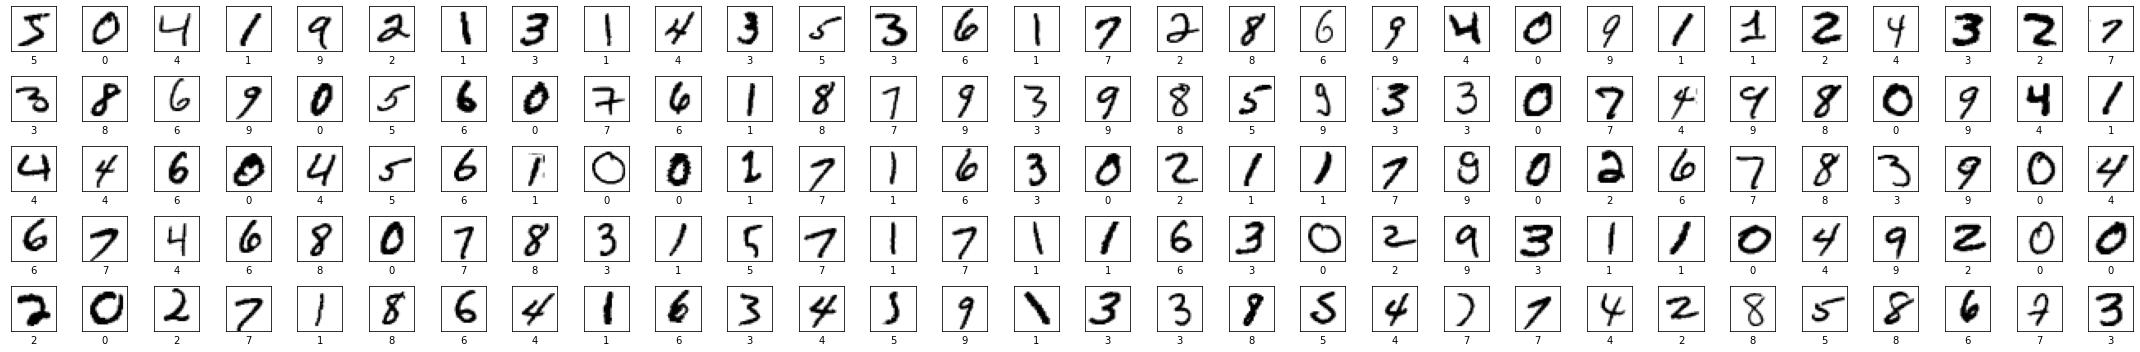

In [21]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train2[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train2[i])
        i += 1
plt.tight_layout()
plt.show()

In [22]:
# Data Normalization

X_train2, X_test2 = X_train2.reshape(-1, 28,28,1).astype("float32") / 255.0, X_test2.reshape(-1, 28,28,1).astype("float32")  / 255.0

In [23]:
# Using 'SGD'

model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [24]:
h2 = model.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.6923 - accuracy: 0.8563 - val_loss: 0.1088 - val_accuracy: 0.9709
Epoch 2/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0942 - accuracy: 0.9727 - val_loss: 0.0773 - val_accuracy: 0.9778
Epoch 3/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0717 - accuracy: 0.9787 - val_loss: 0.0653 - val_accuracy: 0.9811
Epoch 4/5
1200/1200 [==============================] - 42s 35ms/step - loss: 0.0601 - accuracy: 0.9824 - val_loss: 0.0588 - val_accuracy: 0.9832
Epoch 5/5
1200/1200 [==============================] - 41s 34ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0535 - val_accuracy: 0.9843


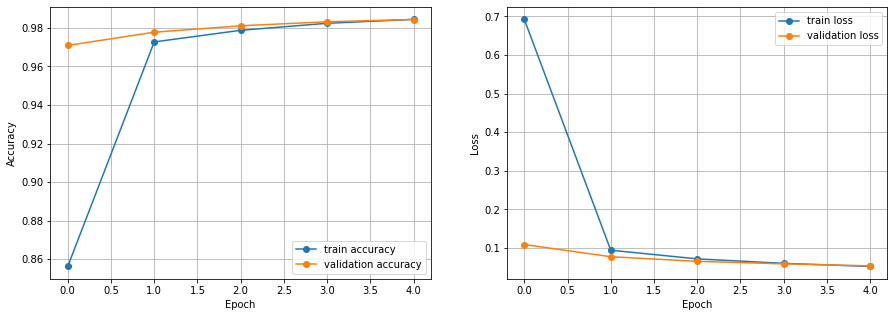

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [26]:
test_loss2, test_acc2 = model.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 3s 8ms/step - loss: 0.0452 - accuracy: 0.9874

Test Accuracy: 0.9873999953269958

Test Loss: 0.04522716999053955


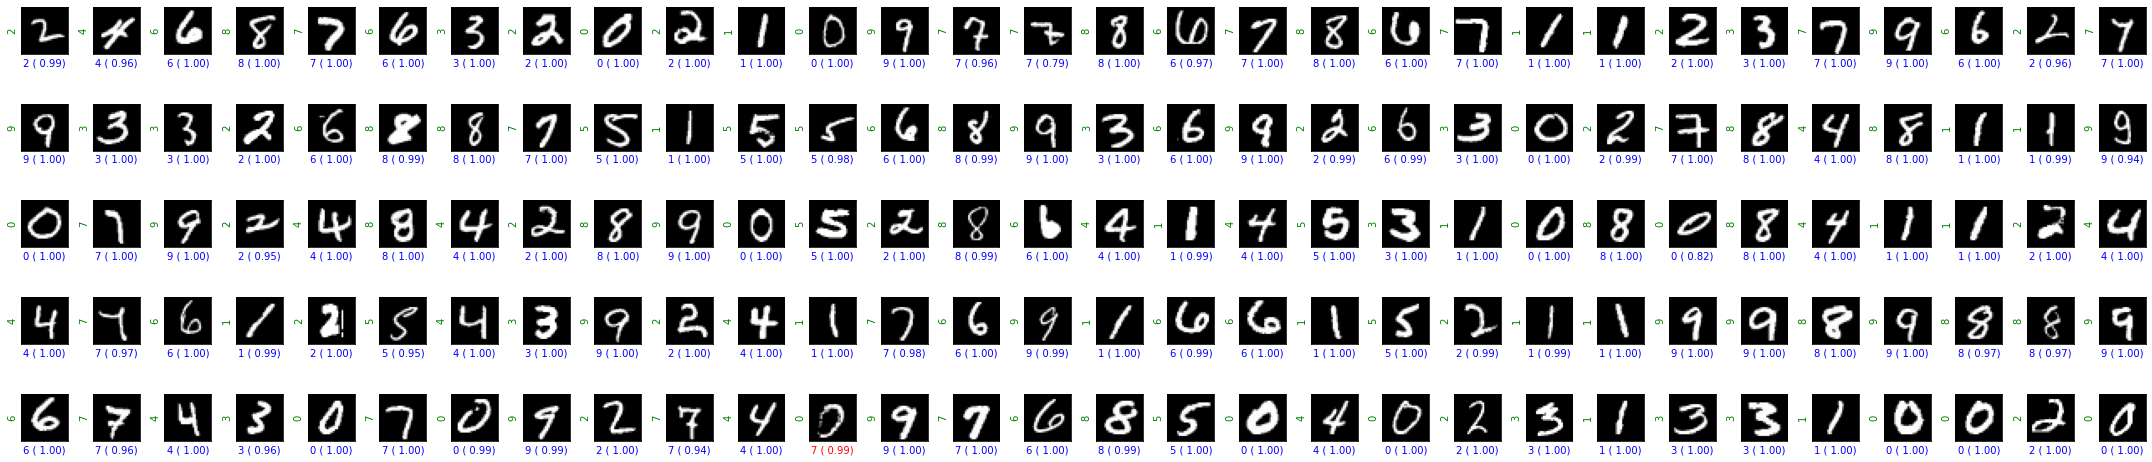

In [27]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [28]:
(X_train3, Y_train3), (X_test3, Y_test3) = mnist.load_data()
print(X_train3.shape, Y_train3.shape)
print(X_test3.shape, Y_test3.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


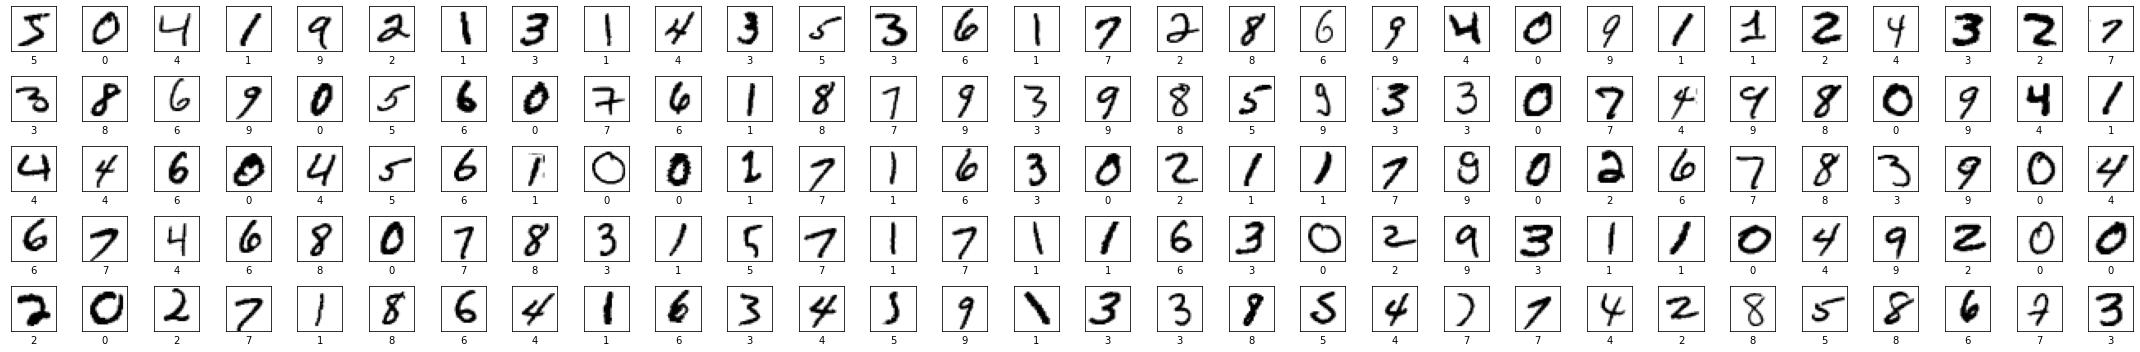

In [29]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train3[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train3[i])
        i += 1
plt.tight_layout()
plt.show()

In [30]:
# Without Normalization

X_train3, X_test3 = X_train3.reshape(-1, 28,28,1), X_test3.reshape(-1, 28,28,1)

In [31]:
# Using 'SGD'

model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [32]:
h3 = model.fit(x=X_train3, y=Y_train3, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 40s 33ms/step - loss: nan - accuracy: 0.1039 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1200/1200 [==============================] - 39s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1200/1200 [==============================] - 39s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1200/1200 [==============================] - 40s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
1200/1200 [==============================] - 40s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995


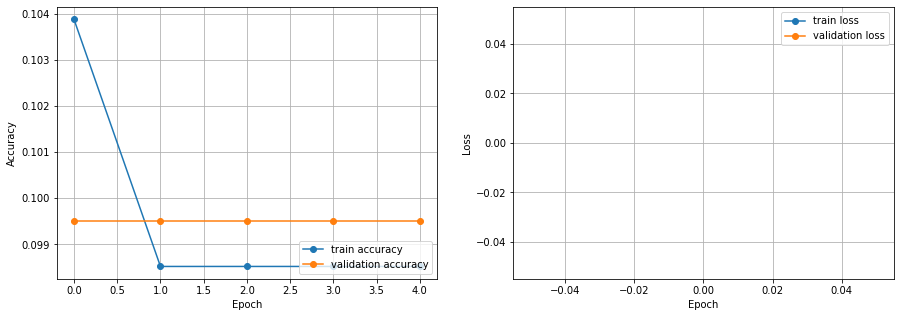

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [34]:
test_loss3, test_acc3 = model.evaluate(X_test3, Y_test3)
print('\nTest Accuracy:', test_acc3)
print('\nTest Loss:', test_loss3)

313/313 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0980

Test Accuracy: 0.09799999743700027

Test Loss: nan


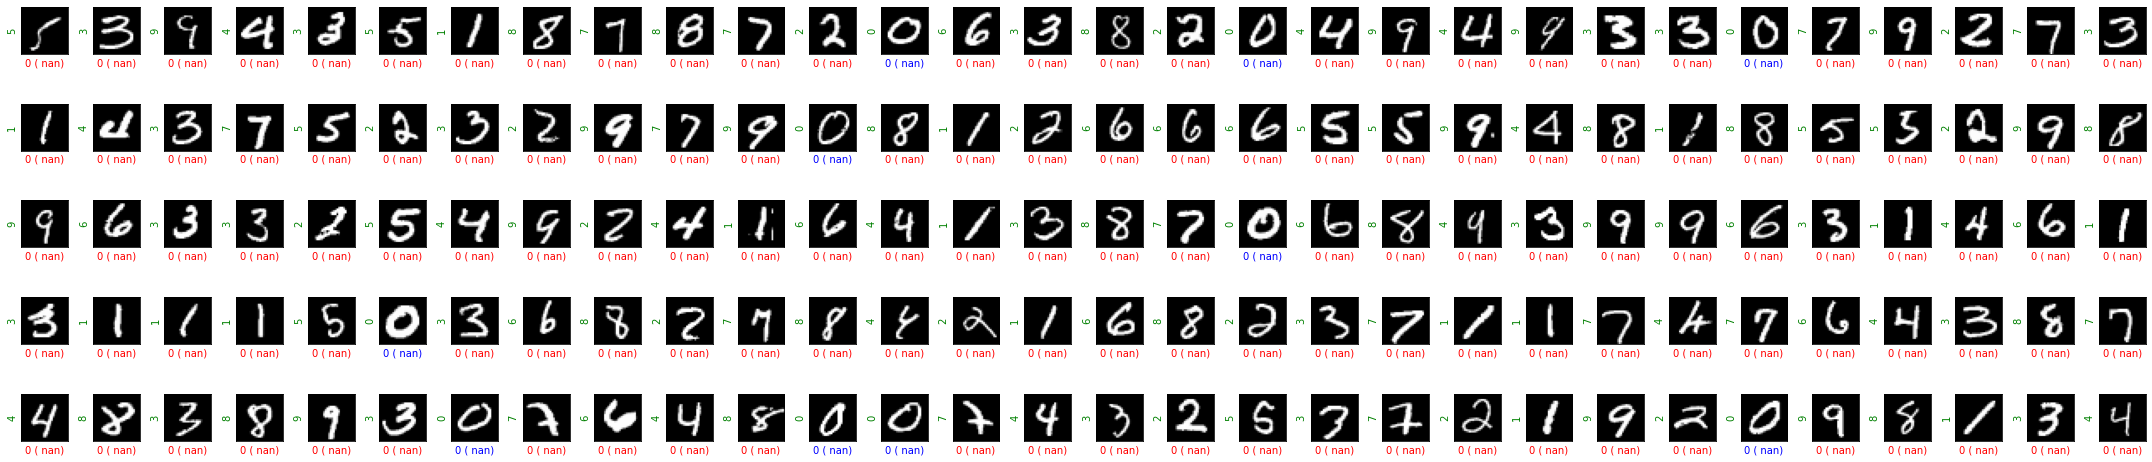

In [35]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test3[random_indices, :]
sample_labels = Y_test3[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [36]:
(X_train4, Y_train4), (X_test4, Y_test4) = mnist.load_data()
print(X_train4.shape, Y_train4.shape)
print(X_test4.shape, Y_test4.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


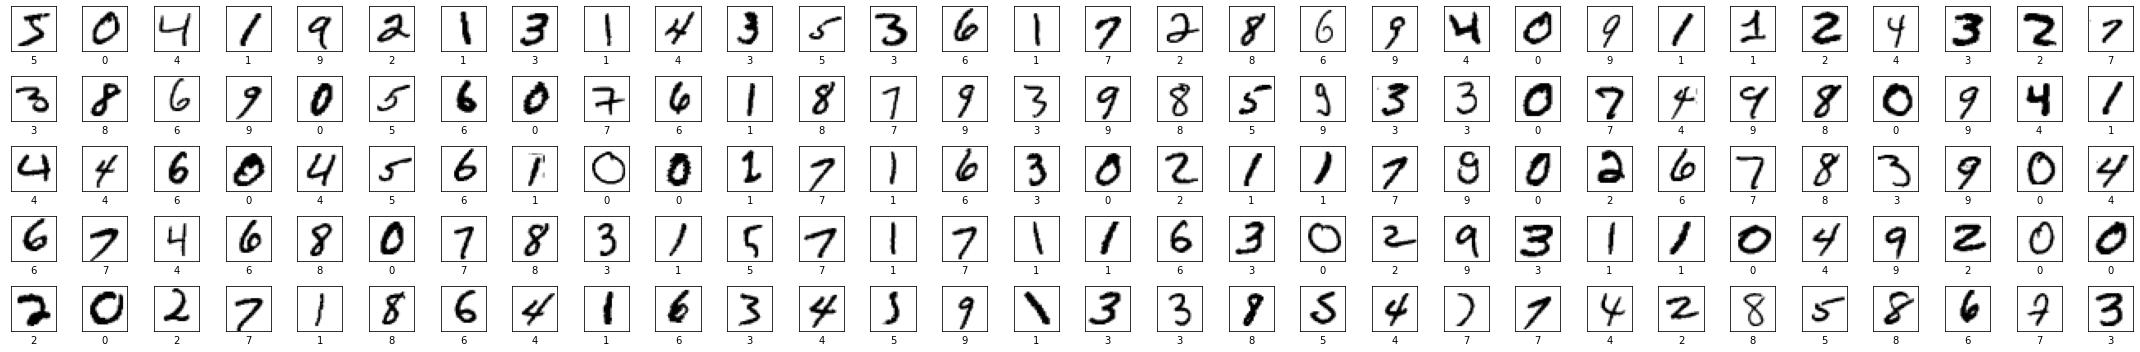

In [37]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train4[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train4[i])
        i += 1
plt.tight_layout()
plt.show()

In [41]:
# Data Normalization

X_train4, X_test4 = X_train4.reshape(-1, 28,28,1).astype("float32") / 255.0, X_test4.reshape(-1, 28,28,1).astype("float32")  / 255.0

In [42]:
# Using 'RMSProp'

model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [43]:
h4 = model.fit(x=X_train4, y=Y_train4, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 40s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1200/1200 [==============================] - 39s 32ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1200/1200 [==============================] - 39s 32ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1200/1200 [==============================] - 39s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
1200/1200 [==============================] - 39s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995


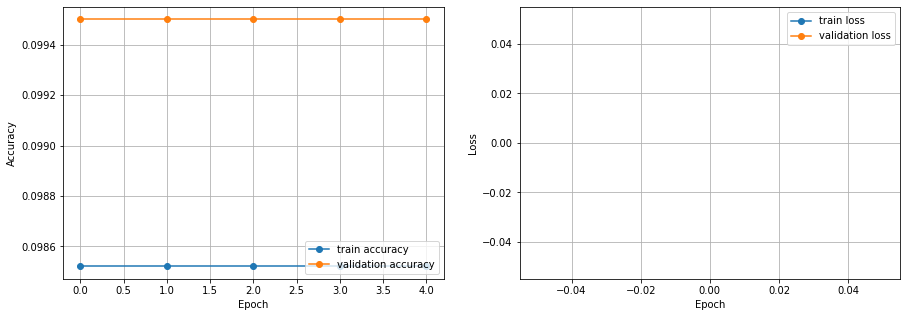

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [45]:
test_loss4, test_acc4 = model.evaluate(X_test4, Y_test4)
print('\nTest Accuracy:', test_acc4)
print('\nTest Loss:', test_loss4)

313/313 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0980

Test Accuracy: 0.09799999743700027

Test Loss: nan


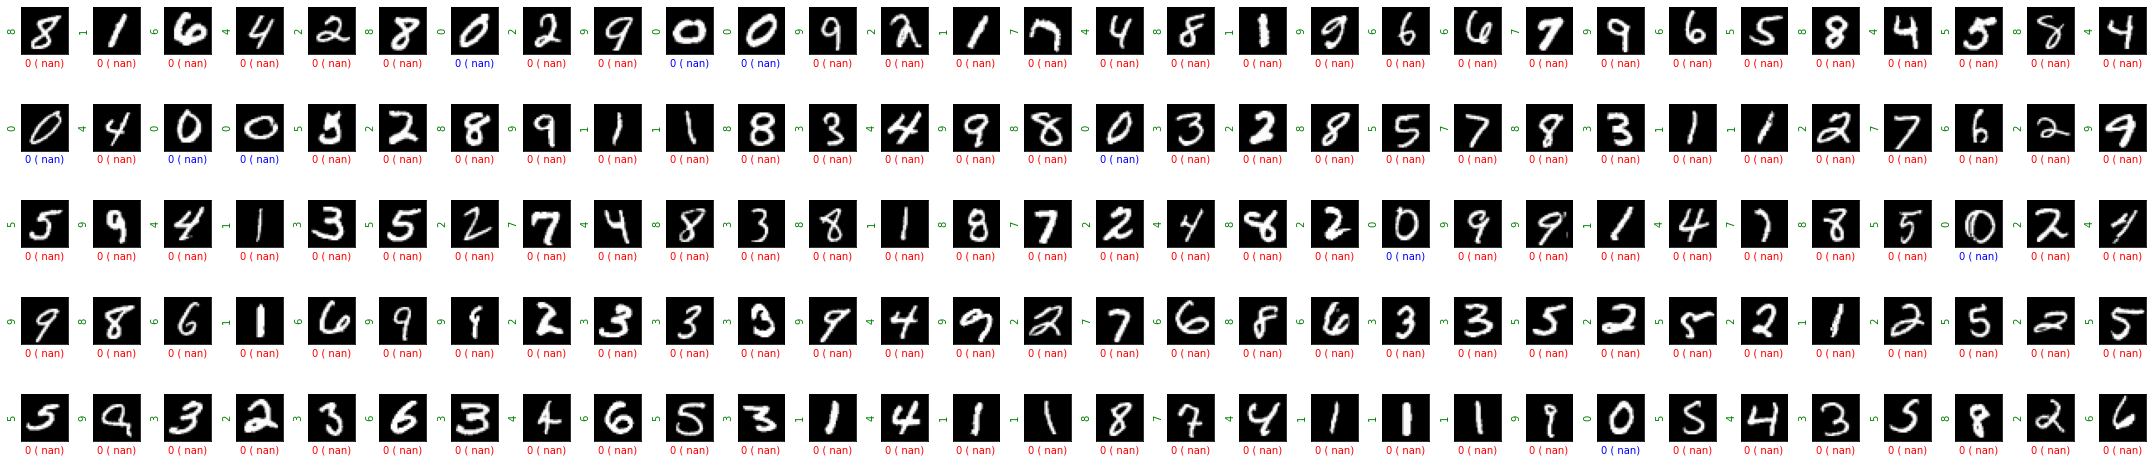

In [54]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test4[random_indices, :]
sample_labels = Y_test4[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [46]:
(X_train5, Y_train5), (X_test5, Y_test5) = mnist.load_data()
print(X_train5.shape, Y_train5.shape)
print(X_test5.shape, Y_test5.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


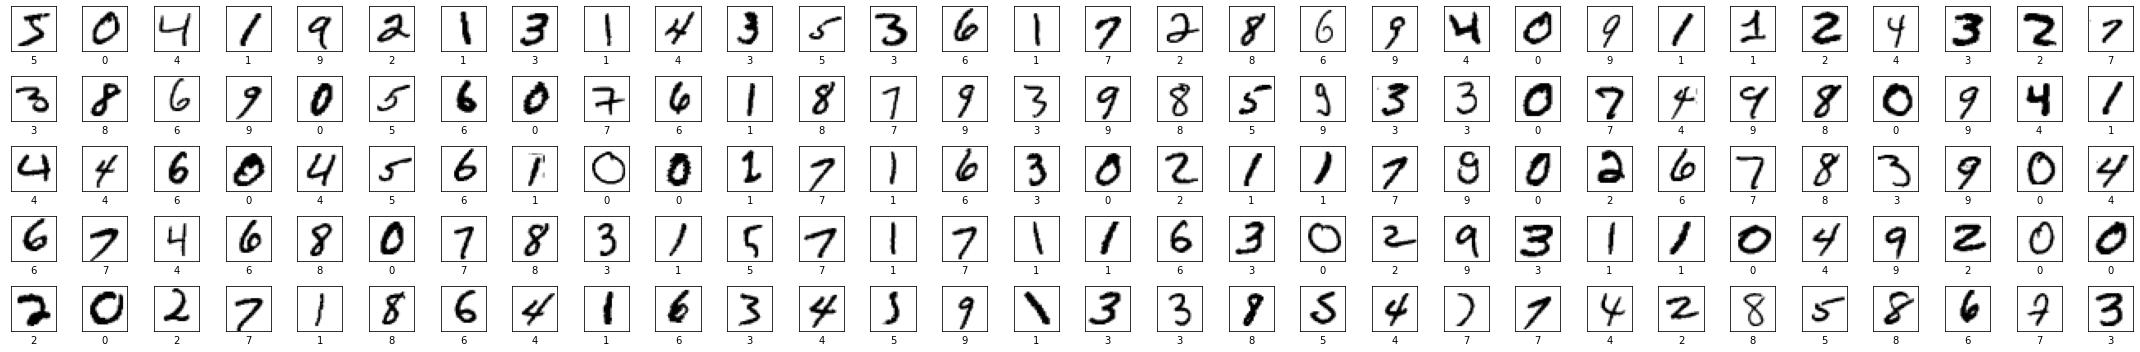

In [47]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train5[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train5[i])
        i += 1
plt.tight_layout()
plt.show()

In [48]:
# Without Normalization

X_train5, X_test5 = X_train5.reshape(-1, 28,28,1), X_test5.reshape(-1, 28,28,1)

In [49]:
# Using 'RMSProp'

model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [50]:
h5 = model.fit(x=X_train5, y=Y_train5, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 40s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1200/1200 [==============================] - 39s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1200/1200 [==============================] - 40s 33ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1200/1200 [==============================] - 40s 34ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
1200/1200 [==============================] - 40s 34ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995


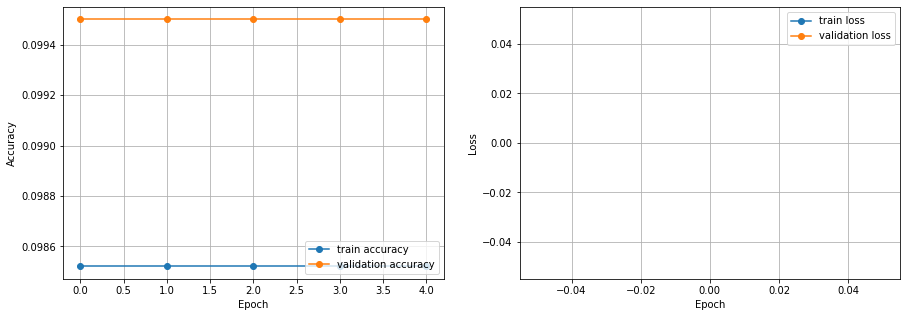

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [52]:
test_loss5, test_acc5 = model.evaluate(X_test5, Y_test5)
print('\nTest Accuracy:', test_acc5)
print('\nTest Loss:', test_loss5)

313/313 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0980

Test Accuracy: 0.09799999743700027

Test Loss: nan


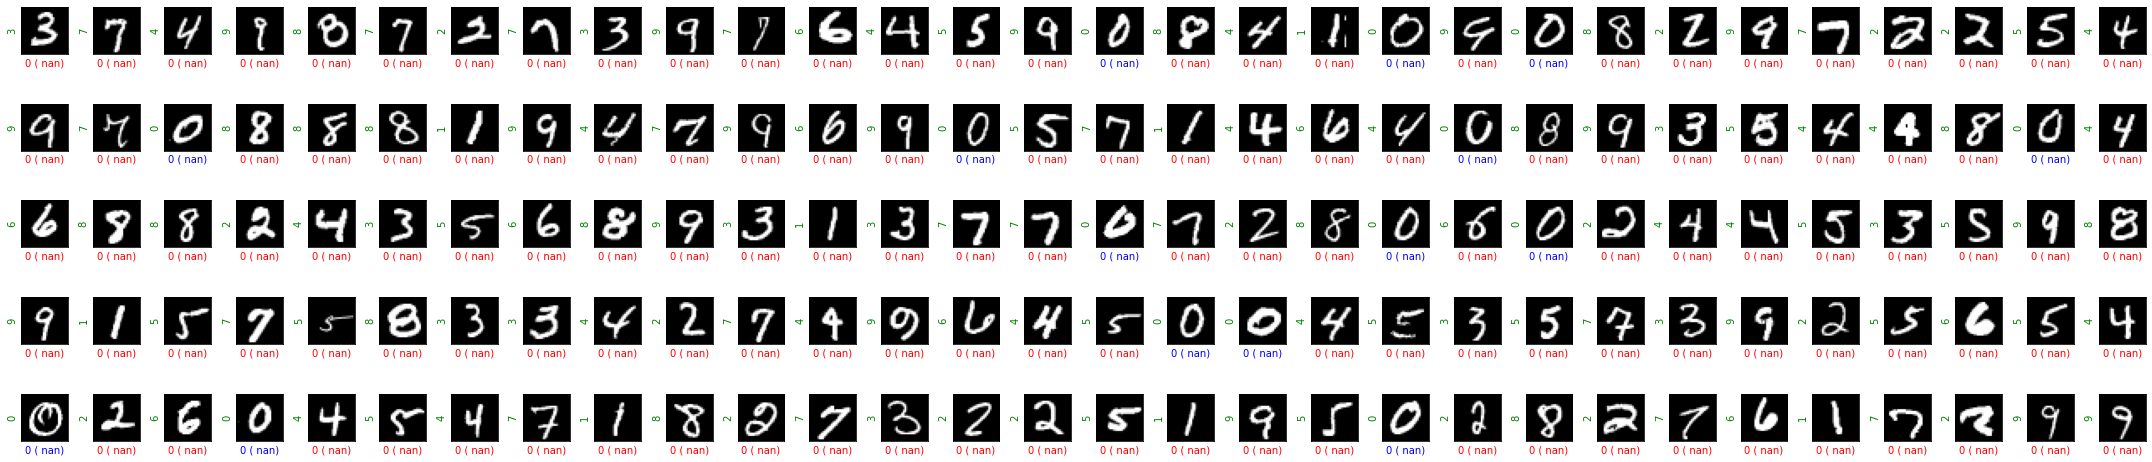

In [53]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test5[random_indices, :]
sample_labels = Y_test5[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()